In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
file_path = ["Data Set/ARUNACHAL_PRADESH.csv","Data Set/ASSAM.csv","Data Set/BIHAR.csv","Data Set/DELHI.csv","Data Set/GOA.csv","Data Set/GUJARAT.csv",
             "Data Set/HIMACHAL_PRADESH.csv","Data Set/JHARKHAND.csv","Data Set/KARNATAKA.csv","Data Set/KERALA.csv","Data Set/MAHARASHTRA.csv",
             "Data Set/MANIPUR.csv","Data Set/MIZORAM.csv","Data Set/NAGALAND.csv","Data Set/ODISHA.csv","Data Set/PUDUCHERRY.csv","Data Set/RAJASTHAN.csv",
             "Data Set/SIKKIM.csv","Data Set/TAMIL_NADU.csv","Data Set/TRIPURA.csv","Data Set/UTTAR_PRADESH.csv","Data Set/UTTARAKHAND.csv","Data Set/WEST_BENGAL.csv"
             ]

In [4]:
dataframes = [pd.read_csv(file, encoding='latin1') for file in file_path]
df = pd.concat(dataframes, ignore_index=True)
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0
195141,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195142,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195143,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [5]:
# Remove backticks from specific columns

df['State Code'] = df['State Code'].str.replace('`', '')
df['District Code'] = df['District Code'].str.replace('`', '')
df['Division'] = df['Division'].str.replace('`', '')
df['Group'] = df['Group'].str.replace('`', '')
df['Class'] = df['Class'].str.replace('`', '')

In [6]:
df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,12,000,STATE - ARUNACHAL PRADESH,00,000,0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,12,000,STATE - ARUNACHAL PRADESH,01,000,0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223


In [7]:
df["NIC Name"].mode()

0    Construction of buildings
Name: NIC Name, dtype: object

In [8]:
# Replacing where NIC Name is 'Blank' and 'Total' to Construction of buildings

df['NIC Name'] = df['NIC Name'].replace('Blank', 'Construction of buildings')
df['NIC Name'] = df['NIC Name'].replace('Total', 'Construction of buildings')
df['NIC Name'] = df['NIC Name'].replace('Incomplete description/ Wrongly Classifed','Construction of buildings')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [10]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Main Workers - Total - Persons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
Main Workers - Total - Males,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
Main Workers - Total - Females,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
Main Workers - Rural - Persons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
Main Workers - Rural - Males,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0
Main Workers - Rural - Females,195145.0,143.583407,4314.446369,0.0,0.0,0.0,8.0,1323903.0
Main Workers - Urban - Persons,195145.0,831.518799,25867.811792,0.0,2.0,12.0,86.0,8849315.0
Main Workers - Urban - Males,195145.0,676.135837,21673.393792,0.0,1.0,9.0,67.0,7354862.0
Main Workers - Urban - Females,195145.0,155.382961,4531.592781,0.0,0.0,0.0,12.0,1494453.0
Marginal Workers - Total - Persons,195145.0,364.267186,11769.400296,0.0,0.0,4.0,28.0,3834122.0


In [12]:
df.columns.tolist()

['State Code',
 'District Code',
 'India/States',
 'Division',
 'Group',
 'Class',
 'NIC Name',
 'Main Workers - Total -  Persons',
 'Main Workers - Total - Males',
 'Main Workers - Total - Females',
 'Main Workers - Rural -  Persons',
 'Main Workers - Rural - Males',
 'Main Workers - Rural - Females',
 'Main Workers - Urban -  Persons',
 'Main Workers - Urban - Males',
 'Main Workers - Urban - Females',
 'Marginal Workers - Total -  Persons',
 'Marginal Workers - Total - Males',
 'Marginal Workers - Total - Females',
 'Marginal Workers - Rural -  Persons',
 'Marginal Workers - Rural - Males',
 'Marginal Workers - Rural - Females',
 'Marginal Workers - Urban -  Persons',
 'Marginal Workers - Urban - Males',
 'Marginal Workers - Urban - Females']

### Visualization

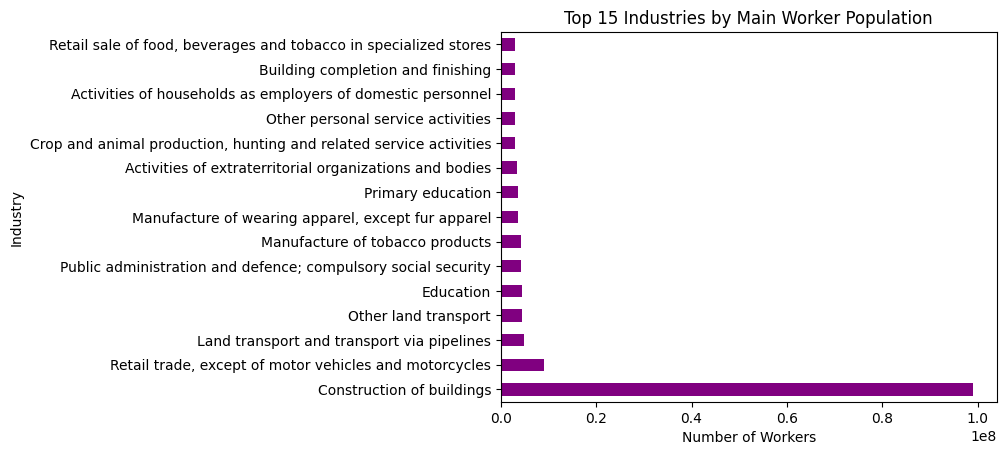

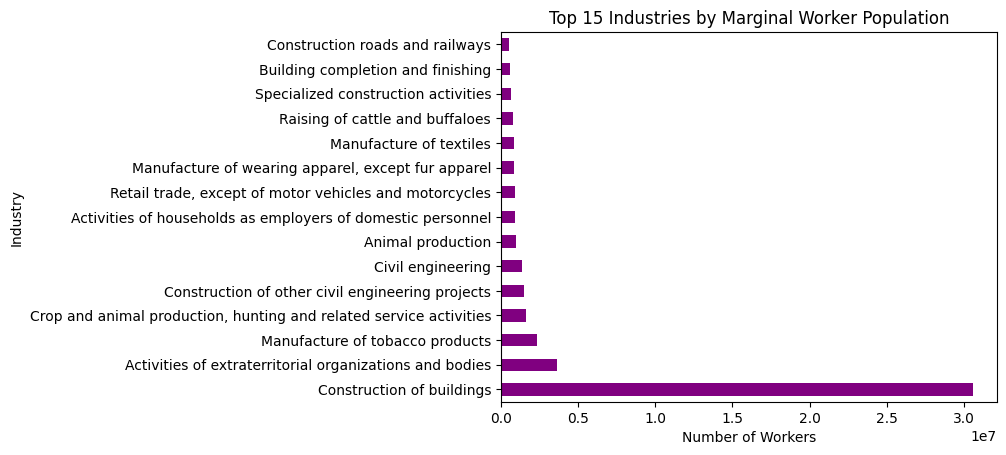

In [13]:
# Main Workers grouped by industry sector (NIC Name)
main_sector_workers = df.groupby('NIC Name')['Main Workers - Total -  Persons'].sum().sort_values(ascending=False).head(15)

# Bar chart of top 15 industries
main_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Main Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()


# Marginal Workers grouped by industry sector (NIC Name)
marginal_sector_workers = df.groupby('NIC Name')['Marginal Workers - Total -  Persons'].sum().sort_values(ascending=False).head(15)

# Bar chart of top 15 industries
marginal_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Marginal Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()

Main Workers - Rural -  Persons        128916440
Main Workers - Urban -  Persons        162266736
Marginal Workers - Rural -  Persons     48830864
Marginal Workers - Urban -  Persons     22254056
dtype: int64


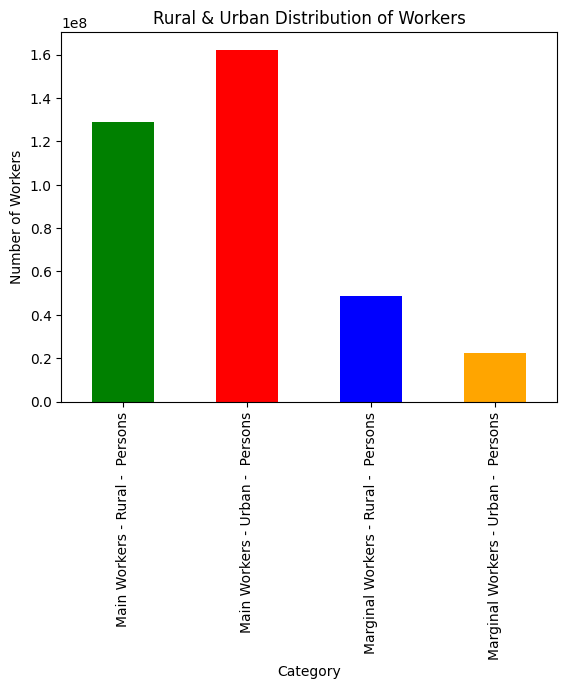

In [14]:
# Workers Rural & Urban distribution
rural_urban_distribution = df[['Main Workers - Rural -  Persons', 'Main Workers - Urban -  Persons',
                  'Marginal Workers - Rural -  Persons', 'Marginal Workers - Urban -  Persons']].sum()
print(rural_urban_distribution)

# Bar chart for rural & urban distribution
rural_urban_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Rural & Urban Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

Main Workers - Total - Males          232841384
Main Workers - Total - Females         58341792
Marginal Workers - Total - Males       35639760
Marginal Workers - Total - Females     35445160
dtype: int64


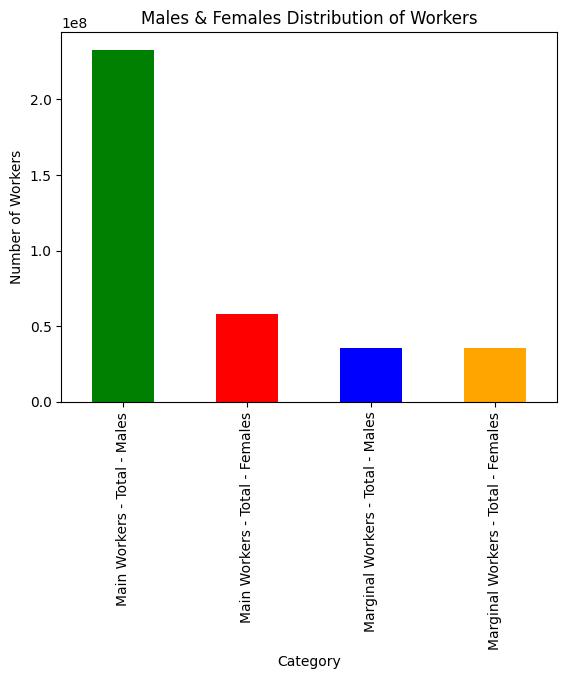

In [ ]:
# Males & Females distribution
males_females_distribution = df[['Main Workers - Total - Males', 'Main Workers - Total - Females',
                    'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']].sum()
print(males_females_distribution)

# Bar chart for Males & Females distribution
males_females_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Males & Females Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

### NLP

In [43]:
df['NIC Name'].value_counts()

NIC Name
Construction of buildings                                      3824
Activities of households as employers of domestic personnel    1308
Manufacture of furniture                                       1239
Water collection, treatment and supply                         1194
Veterinary activities                                          1119
                                                               ... 
Renting and leasing of recreational and sports goods             21
Growing of grapes                                                17
Growing of tobacco                                               16
Building of pleasure and sporting boats                          14
Mining of uranium and thorium ores                                4
Name: count, Length: 584, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',  max_df=0.85, min_df=2, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['NIC Name'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1286620 stored elements and shape (195145, 1873)>

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
df['Industry Group'] = kmeans.fit_predict(tfidf_matrix)

In [21]:
df['Industry Group'].value_counts()

Industry Group
1    90529
0    55133
3    30996
4    16478
2     2009
Name: count, dtype: int64

In [22]:
# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Number of top terms to display for each cluster
top_n = 30

# For each cluster, find the top N terms
for i, centroid in enumerate(centroids):
    # Get the indices of the top terms in this cluster
    top_indices = centroid.argsort()[-top_n:][::-1]  # Sort and get top N terms
    top_terms = [terms[index] for index in top_indices]
    
    print(f"Cluster {i}:")
    print(top_terms)
    print("\n")

Cluster 0:
['activities', 'service', 'service activities', 'telecommunications', 'support', 'telecommunications activities', 'support activities', 'organizations', 'security', 'social', 'accommodation', 'personal service', 'postal', 'veterinary', 'veterinary activities', 'health', 'related', 'transportation', 'membership', 'legal', 'activities accommodation', 'social work', 'work', 'work activities', 'health activities', 'human health', 'human', 'personal', 'membership organizations', 'security activities']


Cluster 1:
['products', 'construction', 'education', 'manufacture', 'buildings', 'construction buildings', 'transport', 'repair', 'wholesale', 'equipment', 'manufacturing', 'mining', 'accommodation', 'household', 'household goods', 'goods', 'logging', 'water', 'metal', 'quarrying', 'growing', 'machinery', 'installation', 'collection', 'non', 'metal products', 'services', 'machinery equipment', 'insurance', 'food']


Cluster 2:
['technical', 'scientific technical', 'technical activ

In [23]:
industry_mapping = {
    0: 'Service Sector',
    1: 'Domestic Works',
    2: 'Engineering Activities',
    3: 'Business',
    4: 'Retails'
}
df['Industry Group'] = df['Industry Group'].map(industry_mapping)

In [24]:
features = ['State Code', 'District Code', 'Industry Group', 'Main Workers - Total -  Persons']
data = df[features]
data = pd.get_dummies(data, columns=['State Code', 'Industry Group'], drop_first=True)

In [25]:
X = data.drop(columns=['Main Workers - Total -  Persons'])
y = data['Main Workers - Total -  Persons']

In [26]:
X

,District Code,State Code_05,State Code_07,State Code_08,State Code_09,State Code_10,State Code_11,State Code_12,State Code_13,State Code_14,...,State Code_27,State Code_29,State Code_30,State Code_32,State Code_33,State Code_34,Industry Group_Domestic Works,Industry Group_Engineering Activities,Industry Group_Retails,Industry Group_Service Sector
0,000,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,000,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,000,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,000,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,000,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,345,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
195141,345,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
195142,345,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
195143,345,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [27]:
y

0         211353
1          12967
2           2373
3            171
4           1944
           ...  
195140        18
195141      8244
195142      8244
195143      8324
195144      8324
Name: Main Workers - Total -  Persons, Length: 195145, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=27)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 1972.5108715176534
MSE: 257244529.50778058
RMSE: 16038.844394400134
R^2: 0.08235132613585128


### Manual Categorisation

In [33]:
industries_list = df["NIC Name"].tolist()

In [34]:
industries_dict = {
    'NIC Name': industries_list
}

df_clean = pd.DataFrame(industries_dict)

In [35]:
categories = {
    'poultry': ['poultry', 'raising of poultry'],
    'agriculture': ['crop', 'animal production', 'farming','growing', 'forestry', 'logging', 'silviculture', 'raising', 'breeding', 'harvest', 'plant',
                    'cereals', 'crops', 'seeds', 'fruits', 'grapes', 'seed'],
    'engineering': ['production', 'factory', 'engineering', 'technical', 'casting', 'building ', 'civil engineering', 'construction', 'site', 
                    'demolition', 'power generation', 'electrical', 'electricity', 'extraction', 'forging', 'stamping', 'industrial', 'maintenance',
                    'machining', 'metals', 'machinery', 'materials', 'packaging', 'spinning', 'printing', 'tanning'],
    'manufacturing' : ['manufacturing', 'manufacture', 'preserving'],
    'retail': ['retail', 'sale', 'trade', 'market', 'advertising', 'beverage', 'publishing', 'broadcasting', 'courier', 'catering', 'textiles', 'leasing',
               'distilling, rectifying and blending of spirits', 'wholesale', 'renting'],
    'mining' : ['mining', 'quarry', 'quarrying'],
    'nature activity' : ['gardens', 'nature reserves activities', 'gathering', 'hunting', 'wood'],
    'fishing': ['fishing', 'aquaculture', 'marine', 'fish'],
    'finance' :['accounting', 'auditing', 'tax', 'financial', 'insurance', 'pension', 'funding', 'fund', 'credit', 'brokers', 'banking', 'funds', 'monetary',
                 'reinsurance'],
    'tourism' : ['accommodation', 'transport', 'transportation', 'tour', 'travel'],
    'education' : ['education', 'educational', 'libraries', 'research'],
    'art' : ['art', 'creative', 'cutting', 'shaping', 'dramatic arts'],
    'culture' : ['cultural', 'museums'],
    'service' : ['service', 'households', 'organizations', 'unions', 'administration', 'cleaning', 'collection', 'security', 'policy', 'defence',
                 'foreign affairs', 'funeral', 'investigation', 'polling', 'news', 'organization', 'care', 'social', 'document', 'postal', 'services', 'safety',
                 'contribution', 'evaluation', 'sewerage', 'treatment'],
    "health" : ['medical', 'hospital', 'health', 'nursing', 'veterinary'],
    'entertainment' : ['amusement', 'park', 'theme', 'parks', 'grounds', 'music', 'video', 'picture', 'media'],
    'business' : ['business', 'employee', 'employer', 'call centres', 'employment', 'head offices', 'companies', 'technical', 'architectural',
                  'consultancy', 'architecture', 'consultancy', 'management', 'textile', 'legal', 'support', 'cargo handling', 'administrative', 'textiles',
                  'human resources', 'photographic', 'plumbing', 'real estate', 'repair', 'restaurants', 'design', 'air conditioning', 'warehousing'],
    'technology' : ['computer', 'programming', 'data processing', 'web portals', 'information', 'telecommunications', 'satellite', 'software'],
    'sports' : ['sports', 'clubs'],
    'illegal' : ['gambling', 'betting'],
    'luxuary activies' : ['hairdressing', 'beauty']
}

In [36]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        return text
    return ''  

df_clean['NIC Name.lower'] = df_clean['NIC Name'].apply(clean_text)

In [37]:
def categorize(description):
    for category, keywords in categories.items():
        if any(keyword in description for keyword in keywords):
            return category
    return 'other'

df_clean['Industry Category'] = df_clean['NIC Name.lower'].apply(categorize)

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clean['Category'] = label_encoder.fit_transform(df_clean['Industry Category'])

In [39]:
df_clean[["NIC Name","Industry Category","Category"]].drop_duplicates(subset=["Category"]).sort_values(by="Category")

,NIC Name,Industry Category,Category
1,"Crop and animal production, hunting and relate...",agriculture,0
174,"Cutting, shaping and finishing of stone",art,1
239,Repair of fabricated metal products,business,2
473,Scientific research and development,education,3
0,Construction of buildings,engineering,4
386,"Camping grounds, recreational vehicle parks an...",entertainment,5
437,"Financial service activities, except insurance...",finance,6
45,Fishing and aquaculture,fishing,7
488,Veterinary activities,health,8
575,Gambling and betting activities,illegal,9


In [40]:
df_cleaned = df_clean.drop(columns=['NIC Name','NIC Name.lower','Industry Category'])

In [41]:
dataframes = pd.concat([df, df_cleaned], axis=1)
dataframes.head(5)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,Category,Industry Group,Category
0,12,000,STATE - ARUNACHAL PRADESH,00,000,0000,Construction of buildings,211353,160166,51187,...,18639,24581,12610,11971,13834,7166,6668,61,Domestic Works,4
1,12,000,STATE - ARUNACHAL PRADESH,01,000,0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,1764,2545,1004,1541,430,207,223,68,Service Sector,0
2,12,000,STATE - ARUNACHAL PRADESH,01,011,0000,Growing of non-perennial crops,2373,1352,1021,...,601,906,441,465,258,122,136,118,Domestic Works,0
3,12,000,STATE - ARUNACHAL PRADESH,01,011,0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,17,30,14,16,3,2,1,114,Domestic Works,0
4,12,000,STATE - ARUNACHAL PRADESH,01,011,0112,Growing of rice,1944,1106,838,...,525,780,375,405,225,105,120,125,Domestic Works,0


In [42]:
dataframes[["NIC Name","Category"]].drop_duplicates()#.sort_values(by="Category")

,NIC Name,Category,Category
0,Construction of buildings,61,4
1,"Crop and animal production, hunting and relate...",68,0
2,Growing of non-perennial crops,118,0
3,"Growing of cereals (except rice), leguminous c...",114,0
4,Growing of rice,125,0
...,...,...,...
55867,Growing of grapes,117,0
56031,Manufacture of anti-sprouting products,160,10
56138,Manufacture of military fighting vehicles,233,10
56452,Leasing of nonfinancial intangible assets,148,15
